# **Upload Dataset From Local Mechine**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl
import os


# Load Dataset

In [ ]:
data = pd.read_csv("electricity_train.csv (1).zip", parse_dates=["datetime"], index_col="datetime")

In [ ]:
data = data.drop(["ID", "var2"], axis=1)
data.head()

,temperature,var1,pressure,windspeed,electricity_consumption
datetime,,,,,
2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,216.0
2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,210.0
2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,225.0
2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,216.0
2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,222.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc574a06ad0>,
      dtype=object)

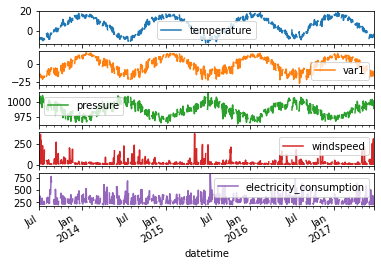

In [ ]:
data.resample("D").mean().plot(subplots=True)

In [ ]:
my_daily_df = data.resample("D").mean()
my_daily_df

,temperature,var1,pressure,windspeed,electricity_consumption
datetime,,,,,
2013-07-01,-8.741667,-17.016667,1003.208333,150.613750,214.000
2013-07-02,-7.566667,-15.687500,1006.375000,10.603125,229.250
2013-07-03,-8.091667,-13.845833,1000.416667,2.790208,380.875
2013-07-04,-7.679167,-14.233333,996.916667,17.119792,296.000
2013-07-05,-7.500000,-17.654167,1001.916667,178.988333,206.375
...,...,...,...,...,...
2017-06-19,-5.275000,-16.162500,1001.041667,245.620833,195.000
2017-06-20,-5.212500,-16.670833,998.166667,305.379375,207.250
2017-06-21,-4.504167,-12.287500,994.250000,5.503750,300.125


# FbPRophet

In [ ]:
from fbprophet import Prophet

In [ ]:
my_df_final = my_daily_df.reset_index()[["datetime", "electricity_consumption"]].rename({"datetime": "ds", "electricity_consumption":"y"}, axis='columns')

In [ ]:
my_df_final.head()

,ds,y
0,2013-07-01,214.000
1,2013-07-02,229.250
2,2013-07-03,380.875
3,2013-07-04,296.000
4,2013-07-05,206.375


In [ ]:
my_df_final.tail()

,ds,y
1449,2017-06-19,195.000
1450,2017-06-20,207.250
1451,2017-06-21,300.125
1452,2017-06-22,306.125
1453,2017-06-23,207.625


## Train Test Split

In [ ]:
train = my_df_final[(my_df_final["ds"] >= "2013-07-01") & (my_df_final["ds"] <= "2017-06-18")]
train

,ds,y
0,2013-07-01,214.000
1,2013-07-02,229.250
2,2013-07-03,380.875
3,2013-07-04,296.000
4,2013-07-05,206.375
...,...,...
1444,2017-06-14,291.125
1445,2017-06-15,199.500
1446,2017-06-16,303.125
1447,2017-06-17,386.875


In [ ]:
test = my_df_final[my_df_final["ds"] >= "2017-06-19"]
test

,ds,y
1449,2017-06-19,195.000
1450,2017-06-20,207.250
1451,2017-06-21,300.125
1452,2017-06-22,306.125
1453,2017-06-23,207.625


In [ ]:
train.shape, test.shape

((1449, 2), (5, 2))

## Model

In [ ]:
model = Prophet()

In [ ]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.params

{'beta': array([[-0.00843616, -0.02294868,  0.00259011, -0.00167265, -0.00689266,
          0.01578906, -0.0006047 , -0.00530853,  0.00682012,  0.00326462,
         -0.0065284 ,  0.00369094, -0.01458355,  0.00057636,  0.01830942,
          0.00153482, -0.01504316, -0.0064782 ,  0.01105479, -0.00446693,
          0.00115777, -0.00829555,  0.00188286,  0.00328571, -0.00091553,
          0.00164771]]),
 'delta': array([[ 4.29931345e-08, -4.02917864e-08, -2.54523990e-08,
         -1.35084410e-02, -1.45071390e-02, -6.23671632e-03,
          2.92823352e-08, -3.29592284e-09, -1.28463962e-09,
         -2.03297431e-07, -2.19862429e-08, -1.09533452e-07,
         -2.37864998e-08, -3.59028215e-08, -2.49943989e-03,
         -1.44544532e-02, -8.25377649e-03, -1.05594805e-03,
         -4.75473279e-03, -1.04118740e-06,  5.27585751e-10,
         -1.94631138e-07, -3.69940296e-06, -6.24471923e-07,
          7.75876250e-09]]),
 'k': array([[0.05093479]]),
 'm': array([[0.34969242]]),
 'sigma_obs': array([

In [ ]:
future = model.make_future_dataframe(periods = 5)


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,290.638117,189.187097,406.281335,290.638117,290.638117,3.286421,3.286421,3.286421,9.157584,9.157584,9.157584,-5.871163,-5.871163,-5.871163,0.0,0.0,0.0,293.924538
1,2013-07-02,290.667352,181.494180,400.864157,290.667352,290.667352,-0.383404,-0.383404,-0.383404,-0.926409,-0.926409,-0.926409,0.543004,0.543004,0.543004,0.0,0.0,0.0,290.283948
2,2013-07-03,290.696588,180.281016,399.181812,290.696588,290.696588,-1.073727,-1.073727,-1.073727,-8.088057,-8.088057,-8.088057,7.014330,7.014330,7.014330,0.0,0.0,0.0,289.622861
3,2013-07-04,290.725823,194.880364,414.204940,290.725823,290.725823,10.603783,10.603783,10.603783,-2.794348,-2.794348,-2.794348,13.398131,13.398131,13.398131,0.0,0.0,0.0,301.329607
4,2013-07-05,290.755059,192.871565,417.202916,290.755059,290.755059,15.359668,15.359668,15.359668,-4.192418,-4.192418,-4.192418,19.552086,19.552086,19.552086,0.0,0.0,0.0,306.114727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2017-06-19,296.819556,155.506177,381.926308,296.819556,296.819556,-27.157826,-27.157826,-27.157826,9.157584,9.157584,9.157584,-36.315410,-36.315410,-36.315410,0.0,0.0,0.0,269.661730
1450,2017-06-20,296.811324,143.172196,373.965188,296.811324,296.811324,-39.466056,-39.466056,-39.466056,-0.926409,-0.926409,-0.926409,-38.539648,-38.539648,-38.539648,0.0,0.0,0.0,257.345267
1451,2017-06-21,296.803092,127.083463,367.052254,296.803092,296.803092,-47.935974,-47.935974,-47.935974,-8.088057,-8.088057,-8.088057,-39.847917,-39.847917,-39.847917,0.0,0.0,0.0,248.867118
1452,2017-06-22,296.794860,152.862233,370.919573,296.794860,296.794860,-43.002884,-43.002884,-43.002884,-2.794348,-2.794348,-2.794348,-40.208536,-40.208536,-40.208536,0.0,0.0,0.0,253.791976


In [ ]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1449,2017-06-19,269.661730,155.506177,381.926308
1450,2017-06-20,257.345267,143.172196,373.965188
1451,2017-06-21,248.867118,127.083463,367.052254
1452,2017-06-22,253.791976,152.862233,370.919573
1453,2017-06-23,252.983340,132.393182,365.456848


## **Evaluate Model**

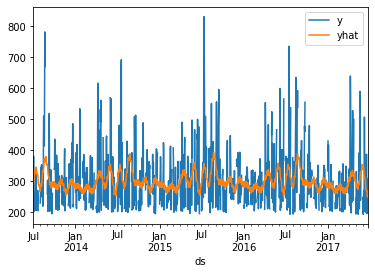

In [ ]:
pd.concat([my_df_final.set_index('ds')['y'], forecast.set_index('ds')["yhat"]], axis=1).plot()

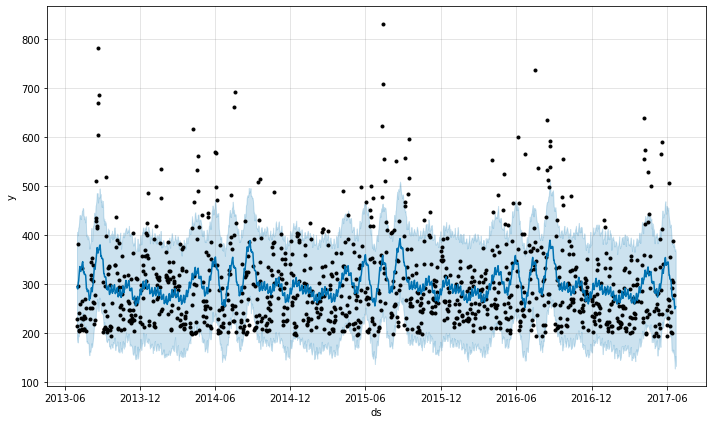

In [ ]:
fig1 = model.plot(forecast)


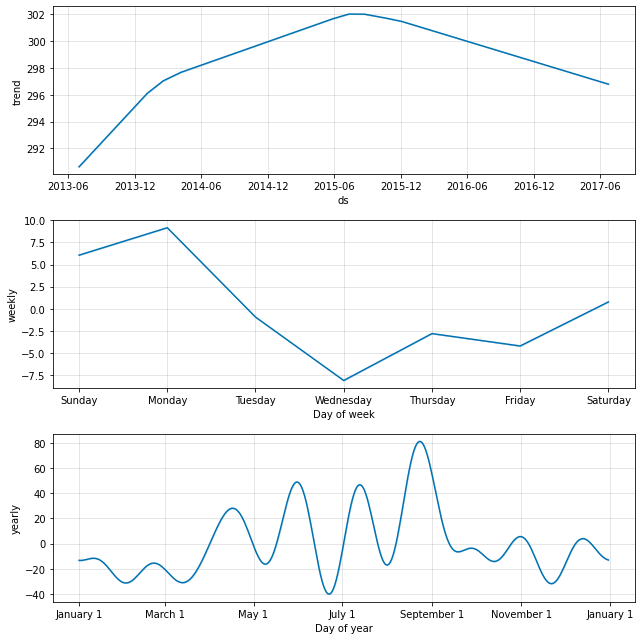

In [ ]:
fig2 = model.plot_components(forecast)

## **FbProphet Plot**

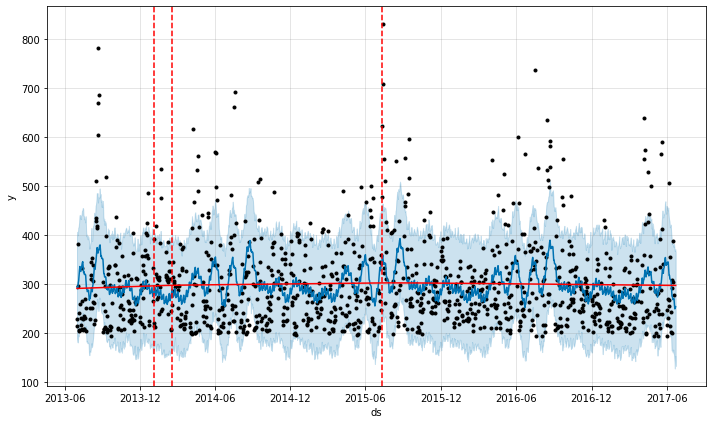

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [ ]:
deltas = model.params['delta'].mean(0)
deltas

array([ 4.29931345e-08, -4.02917864e-08, -2.54523990e-08, -1.35084410e-02,
       -1.45071390e-02, -6.23671632e-03,  2.92823352e-08, -3.29592284e-09,
       -1.28463962e-09, -2.03297431e-07, -2.19862429e-08, -1.09533452e-07,
       -2.37864998e-08, -3.59028215e-08, -2.49943989e-03, -1.44544532e-02,
       -8.25377649e-03, -1.05594805e-03, -4.75473279e-03, -1.04118740e-06,
        5.27585751e-10, -1.94631138e-07, -3.69940296e-06, -6.24471923e-07,
        7.75876250e-09])

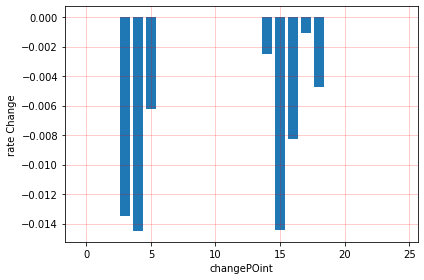

In [ ]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot()
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel("rate Change")
ax.set_xlabel("changePOint")
fig.tight_layout()

In [ ]:
model.changepoints

35    2013-08-13
70    2013-10-02
105   2013-11-14
140   2014-01-03
176   2014-02-16
211   2014-04-05
246   2014-05-17
281   2014-07-06
316   2014-08-18
351   2014-10-07
386   2014-11-19
421   2015-01-08
457   2015-02-21
492   2015-04-10
527   2015-05-22
562   2015-07-11
597   2015-08-23
632   2015-10-12
667   2015-12-01
702   2016-01-13
738   2016-03-03
773   2016-04-15
808   2016-06-04
843   2016-07-16
878   2016-09-05
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


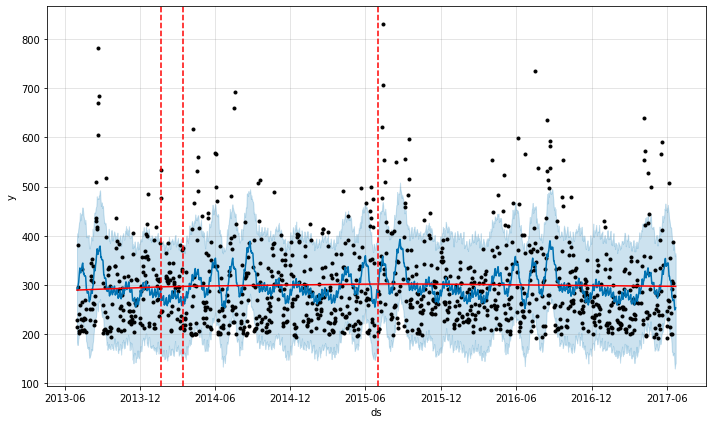

In [ ]:
pro_change = Prophet(changepoint_range=0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(model, forecast)
py.iplot(fig)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model=model, initial='731 days', horizon="365 days")

INFO:fbprophet:Making 2 forecasts with cutoffs between 2015-12-18 12:00:00 and 2016-06-18 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-12-19,319.787697,204.436431,430.085837,291.375,2015-12-18 12:00:00
1,2015-12-20,322.331851,206.898452,435.362409,282.375,2015-12-18 12:00:00
2,2015-12-21,321.999307,207.911354,435.408656,256.000,2015-12-18 12:00:00
3,2015-12-22,318.565822,202.975411,434.707984,265.750,2015-12-18 12:00:00
4,2015-12-23,316.210615,200.101088,438.413182,318.500,2015-12-18 12:00:00


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,35 days 00:00:00,9855.201501,99.273368,68.519059,0.224446,0.163949,0.854545
1,35 days 12:00:00,9959.874015,99.799168,69.475559,0.229234,0.173493,0.854545
2,44 days 00:00:00,10093.978583,100.468794,70.666030,0.231720,0.198743,0.854545
3,44 days 12:00:00,10173.708770,100.864804,71.345751,0.235372,0.206264,0.854545
4,45 days 00:00:00,10161.069263,100.802129,70.872210,0.233700,0.206264,0.854545
...,...,...,...,...,...,...,...
492,363 days 00:00:00,8388.340522,91.587884,71.576304,0.265729,0.242866,0.818182
493,363 days 12:00:00,8334.578434,91.293912,71.247977,0.263042,0.242866,0.818182
494,364 days 00:00:00,8546.324216,92.446332,72.361665,0.263578,0.242866,0.800000
495,364 days 12:00:00,8541.623148,92.420902,72.201562,0.262882,0.242866,0.800000
